<a href="https://colab.research.google.com/github/varunpothu/Smart_HealthCare_Chatbot/blob/main/EDA_Disease_Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the Libraries

In [ ]:
# Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")


## Data Loading

In [ ]:
# Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/4.csv")

## Data Preprocessing


In [ ]:
# Data Cleaning
# Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.dropna(subset=['question', 'answer'], inplace=True)

In [ ]:
# Text Preprocessing
# Removing Special Charectors
df['question_clean'] = df['question'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()
df['answer_clean'] = df['answer'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()

## EDA (Exploratory Data Analysis)

In [ ]:
# Focus area distribution
focus_area_counts = df['focus_area'].value_counts()

# Source distribution
source_counts = df['source'].value_counts()

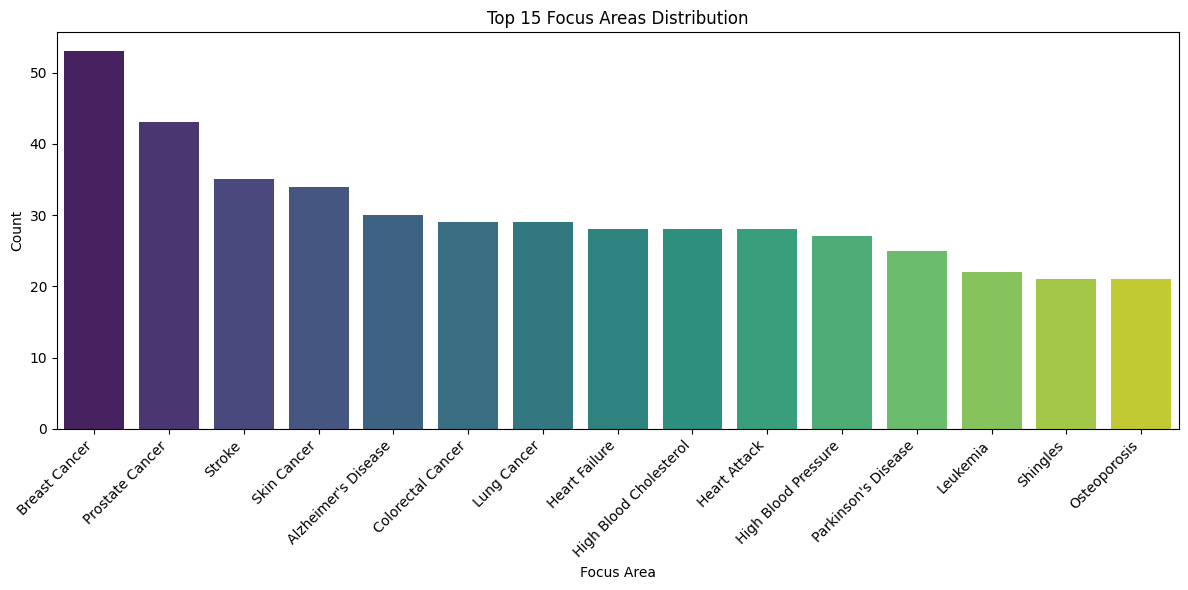

In [ ]:
# 1. Top 15 Focus Areas Distribution
# Get the top 15 focus areas
top_focus_areas = df['focus_area'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_focus_areas.index, y=top_focus_areas.values, palette='viridis')
plt.title('Top 15 Focus Areas Distribution')
plt.xlabel('Focus Area')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

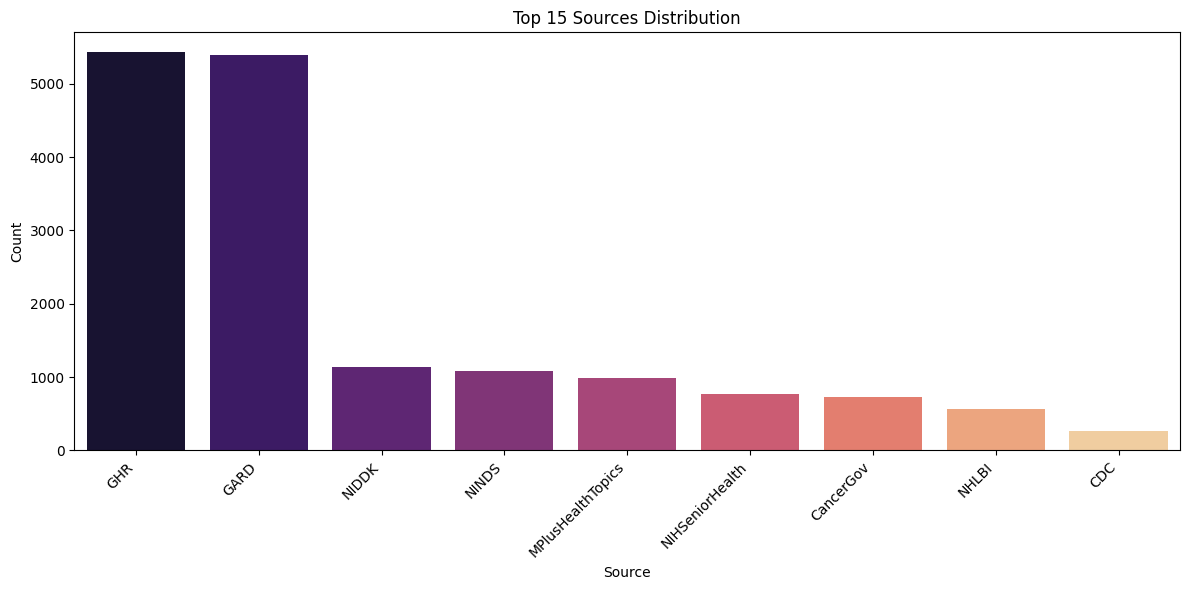

In [ ]:
# 2. Top 15 Sources Distribution (using Seaborn)

# Get the top 15 sources  <-- Added this line to define top_sources
top_sources = df['source'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='magma')
plt.title('Top 15 Sources Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

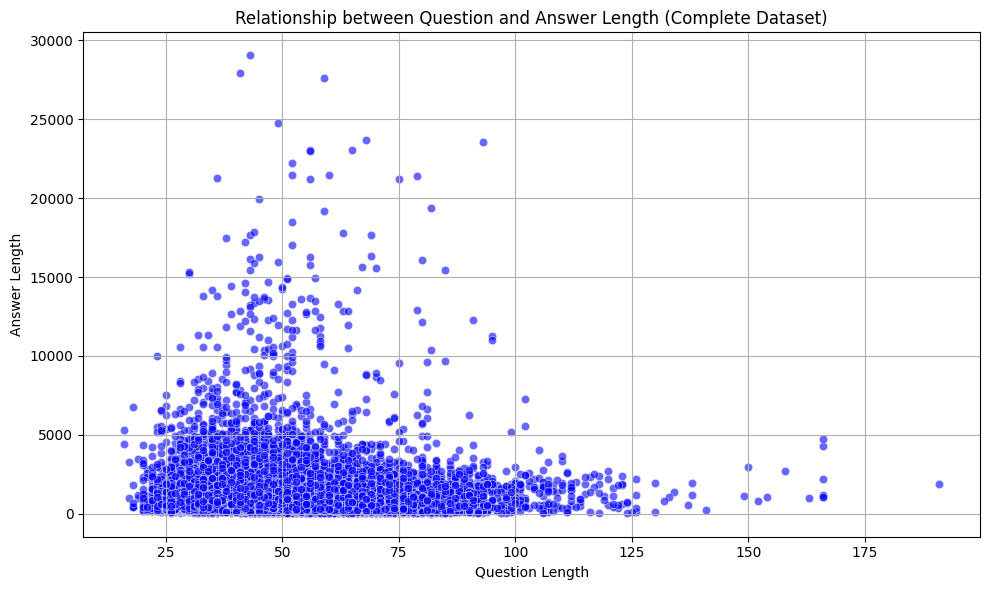

In [ ]:
# 3. Relationship between Question and Answer Lengths

# Calculate the length of questions and answers
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

# Use the complete dataset for the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='question_length', y='answer_length', alpha=0.6, color='blue')
plt.title('Relationship between Question and Answer Length (Complete Dataset)')
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.grid(True)
plt.tight_layout()
plt.show()

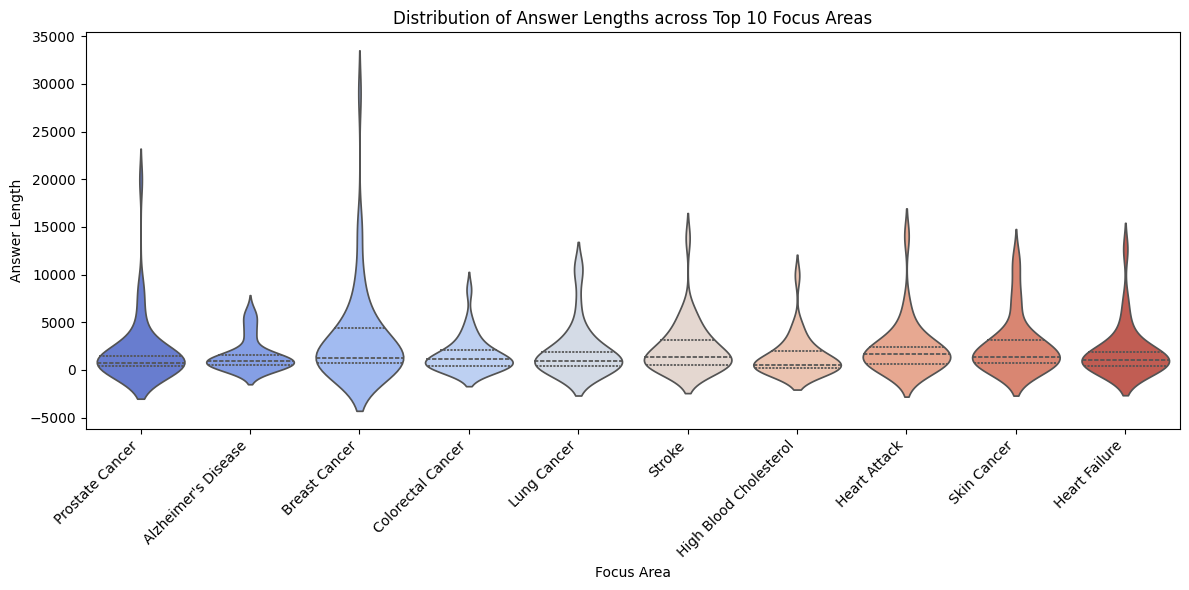

In [ ]:
# 4. Distribution of Answer Lengths Across Focus Areas

# focusing on the top 10 focus areas:
top_10_focus_areas = df['focus_area'].value_counts().head(10).index
filtered_focus_area = df[df['focus_area'].isin(top_10_focus_areas)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='focus_area', y='answer_length', data=filtered_focus_area, scale='width', inner='quartile', palette='coolwarm')
plt.title("Distribution of Answer Lengths across Top 10 Focus Areas")
plt.xlabel("Focus Area")
plt.ylabel("Answer Length")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

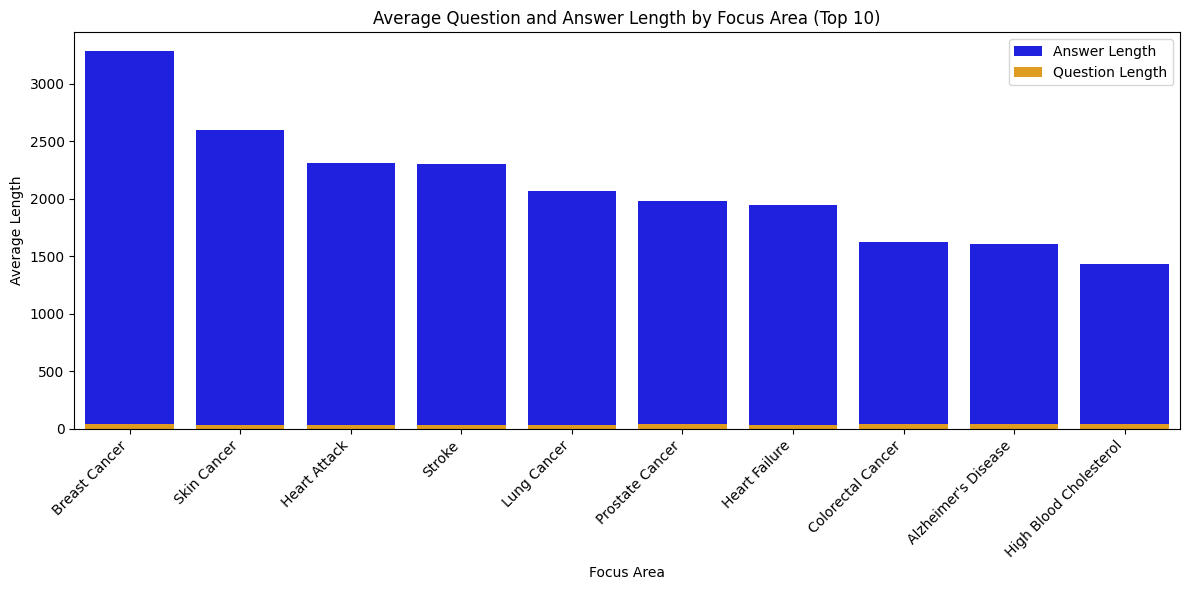

In [ ]:
# 5. Average Question and Answer Length by Focus Area (Bar Plot)
avg_lengths = filtered_focus_area.groupby('focus_area')[['question_length', 'answer_length']].mean().reset_index()
avg_lengths = avg_lengths.sort_values(by='answer_length', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=avg_lengths, x='focus_area', y='answer_length', color='blue', label='Answer Length')
sns.barplot(data=avg_lengths, x='focus_area', y='question_length', color='orange', label='Question Length')
plt.title("Average Question and Answer Length by Focus Area (Top 10)")
plt.xlabel("Focus Area")
plt.ylabel("Average Length")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


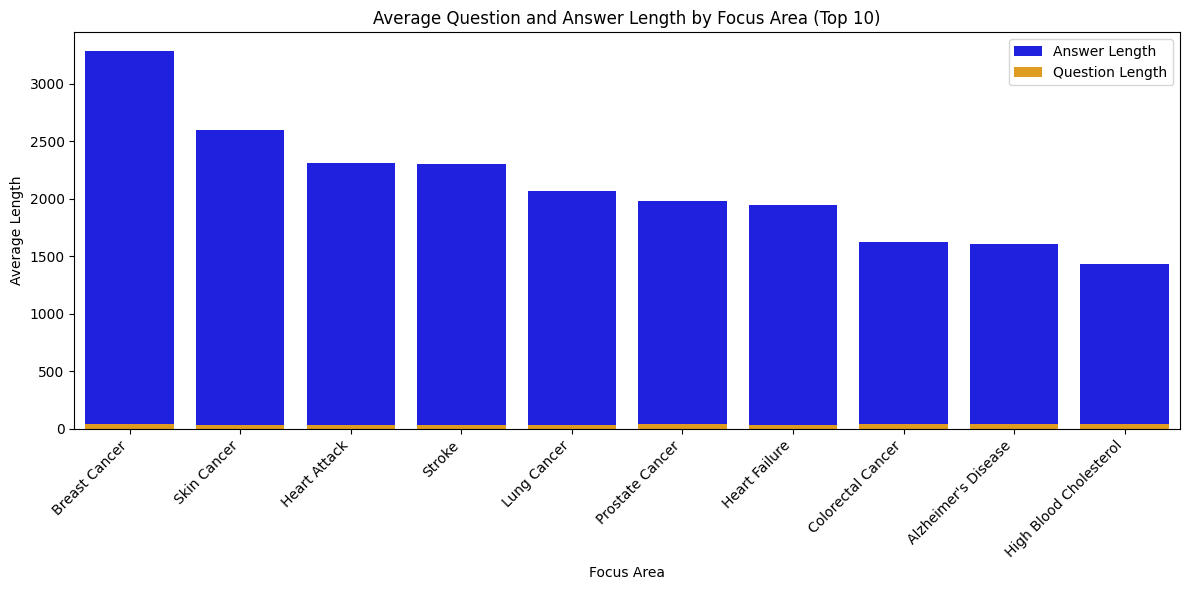

In [ ]:
# 5. Average Question and Answer Length by Focus Area (Bar Plot)
# Calculate average question and answer lengths by focus area
avg_lengths = filtered_focus_area.groupby('focus_area')[['question_length', 'answer_length']].mean().reset_index()
avg_lengths = avg_lengths.sort_values(by='answer_length', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=avg_lengths, x='focus_area', y='answer_length', color='blue', label='Answer Length')
sns.barplot(data=avg_lengths, x='focus_area', y='question_length', color='orange', label='Question Length')
plt.title("Average Question and Answer Length by Focus Area (Top 10)")
plt.xlabel("Focus Area")
plt.ylabel("Average Length")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

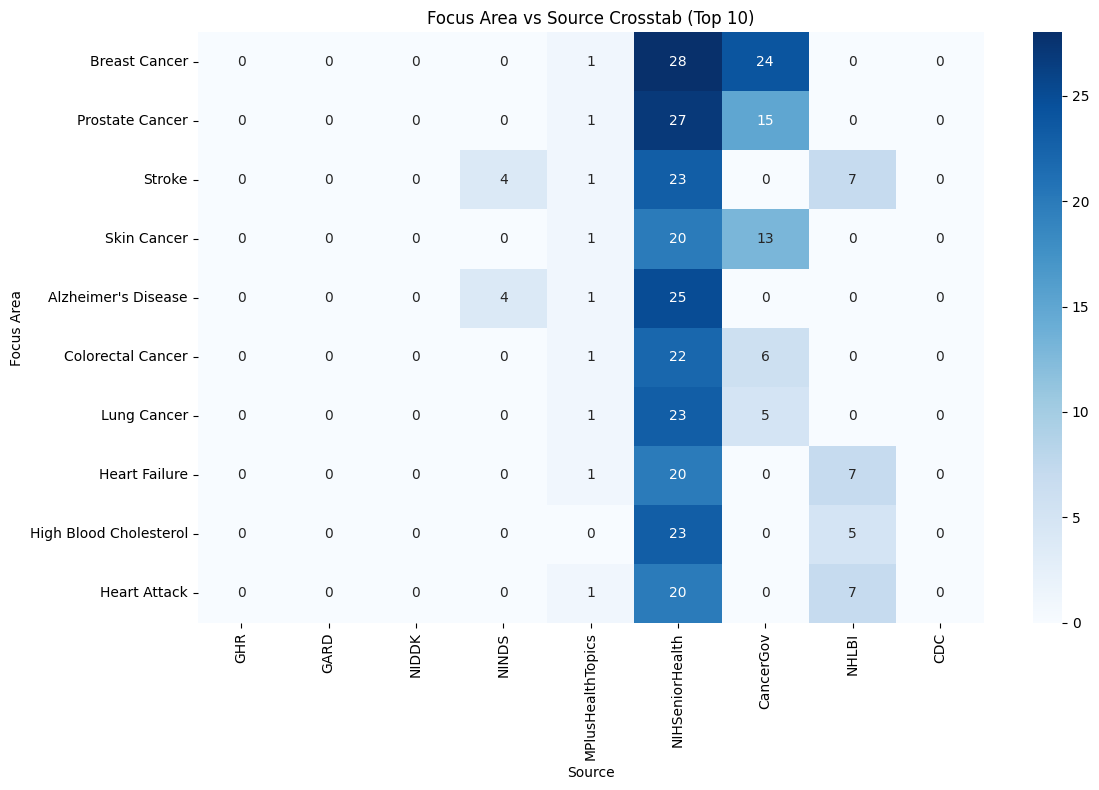

In [ ]:
# 6. Heatmap of Focus Area and Source Crosstab
focus_source_crosstab = pd.crosstab(df['focus_area'], df['source'])

# Get the top 10 sources
top_10_sources = df['source'].value_counts().head(10).index

focus_source_crosstab = focus_source_crosstab[top_10_sources].loc[top_10_focus_areas]

plt.figure(figsize=(12, 8))
sns.heatmap(focus_source_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Focus Area vs Source Crosstab (Top 10)")
plt.xlabel("Source")
plt.ylabel("Focus Area")
plt.tight_layout()
plt.show()

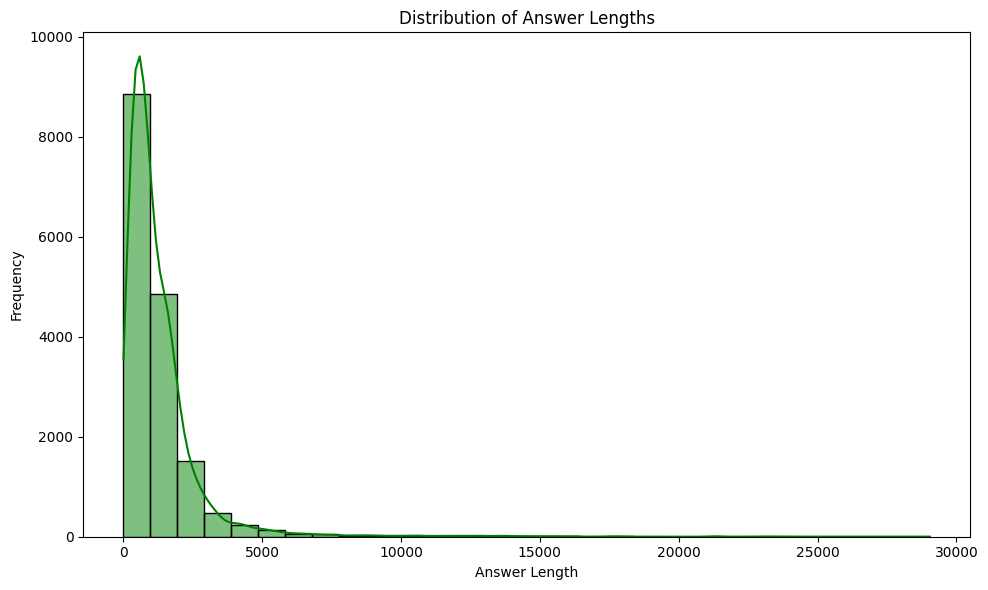

In [ ]:
# 7. Answer Length Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='answer_length', bins=30, kde=True, color='green')
plt.title("Distribution of Answer Lengths")
plt.xlabel("Answer Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
